# How Does COVID Influence People's Travel
### Jack Liu, HCDE-410 final project, University Of Washington
### Introduction and background
COVID's dilemma is the most significant issue we've had to deal with in recent times. It has a huge impact on us and our lives, particularly our trip plans. People need to stay home to keep safe, and their are also a lot of “ban laws” that limit flight and restrict people at home to control the pandemic. In China, there are some strict restrictions on flights. I read a number of articles regarding the Chinese civil aviation industry's report, and they indicate about 45 percent decline in domestic flights and about 85 percent drop in international flights.([source article but chinese](https://baijiahao.baidu.com/s?id=1728787497302380294&wfr=spider&for=pc)). I intend to return to China in summer 2020, but due to the new restriction rule, there are few planes available, and tickets often cost $10,000. Civil aviation, in my opinion, is one of the most severely impacted industry by COVID. However, I didn't know much about the United States. So it will be really interesting to instigate the situation in the United States.<br>
I'm going to use air line dataset for year 2018, 2019, 2020, and 2021 from [Bureau of Transportation Statistics](https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=GED&QO_fu146_anzr=Nv4%20Pn44vr45) to see changes. 2019, 2018 are the year before pandemic, 2020 is the year during pandemic and 2021 is after pandemic. The dataset contains summary f each or each air line, notflight. The dataset also contains both passenger(civil) and cargo flight information.
### Research questions
COVID definitely have some impact on our life. So, first I want to instigate during pandemic **dose COVID influence our mobility(can be represent by amount of flight's passengers and air lines). If so, how much it affecting on us**. Second, **which state being influenced the most**. Third, I'm also interested in **how does COVID affect our cargo transportation?**
- My hypothesis is their will be significantly(more than 50%) amount of passengers drop in 2020(pandemic year) as compare to non pandemic years. And also little(less than 10%) drop of amount of cargo in pandemic years.
### Methodology
In order to make analysis, I'm going to use python and python librarys: pandas(process data), seaborn(make visualization), matplotlib(process graph) and geopandas(process map data). Also I'm going to ignored data with all three variable `PASSENGERS, FREIGHT, MAIL` equal 0 because those data netither belong to civil or cargo flight.
- To answer the first question: how does COVID influence our mobility:
    - The amount of passengers shows if people travel a lot, so in order to check how COVID influence our mobility, we need to take look on amount of passengers and use descriptive statistics and reduction rate to look at the difference between pandemic and non pandemic years. Also we can look at how air routes changes during those years. If the air route and passengers reduce a lot during pandemic years but not other years, we can tell COVID have influence on our mobility.
    1. Looking at data with variable `PASSENGERS` > 0, to get civil air route and make year on year comparison to see how dose civil air line change.
    2. Looking at variable `PASSENGERS` and sum up all the passengers for each year and make comparison to see if the amount of passengers increase or decrease.
    3. Use reduction rate for passengers to verify my hypothesis. Reduction rate is the ratio of the reduction in the value of the current period compared with the same statistical period of last year.
    4. Make a line plot for each year with amount of passengers by month(x-axis is month), put them on the same graph to make direct comparison(descriptive statistics)
- To answer the second question: which state being influenced the most:
    - We need to take look at how does total passengers for each state change over time to see if pandemic bring some influence. Also using year on year comparison and descriptive statistics.
    1. Use pandas function `group_by` to group 
- To answer the third question: will the COVID affect our cargo transportation:
    - We need to take look on amount of cargo and use descriptive statistics and year on year comparison to look at the difference between pandemic and non pandemic years.

### Findings
### Limitations
My dataset has certain drawbacks, it only includes summary of flights but not full scheduled flight. So the dataset will not give us all the flight and there is no direct indicator shows flight is cance tled dueo COVID. However, since the data only reveals a huge amount of decline in passengers but not cargo transport with no other "big event" occurred in addition to COVID, it's reasonable to assume that the decrease in travel is due to pandemic.
### Conclusion

## Data analysis:
First, we need to import all the filght data, us map data and librarys we need to use

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

us_map = "./map/s_22mr22.shp"
flight_2018 = pd.read_csv("./flight_2018.csv")
flight_2019 = pd.read_csv("./flight_2019.csv")
flight_2020 = pd.read_csv("./flight_2020.csv")
flight_2021 = pd.read_csv("./flight_2021.csv")


First we want to filter data which netither belong to civil or cargo flight.We can do that by check all three variable `PASSENGERS, FREIGHT, MAIL` equal 0 or not. If not, it is valid data for this project.<br>
Following code filter the data.

In [29]:
flight_2018 = flight_2018[(flight_2018["PASSENGERS"] > 0) | (flight_2018["FREIGHT"] > 0) | (flight_2018["MAIL"] > 0)]
flight_2019 = flight_2019[(flight_2019["PASSENGERS"] > 0) | (flight_2019["FREIGHT"] > 0) | (flight_2019["MAIL"] > 0)]
flight_2020 = flight_2020[(flight_2020["PASSENGERS"] > 0) | (flight_2020["FREIGHT"] > 0) | (flight_2020["MAIL"] > 0)]
flight_2021 = flight_2021[(flight_2021["PASSENGERS"] > 0) | (flight_2021["FREIGHT"] > 0) | (flight_2021["MAIL"] > 0)]


### Part 1
From here, we have all we need to answer question 1: **how does COVID influence our mobility**<br>
First, we can look at how civil air line change. We need to focuse on flight with passengers. Following code filter data to only civil air route and count how many air route in each year.

In [30]:
civil_2018 = flight_2018[flight_2018["PASSENGERS"] > 0]
civil_2019 = flight_2019[flight_2019["PASSENGERS"] > 0]
civil_2020 = flight_2020[flight_2020["PASSENGERS"] > 0]
civil_2021 = flight_2021[flight_2021["PASSENGERS"] > 0]

In [31]:
route_count_2018 = civil_2018.shape[0]
route_count_2019 = civil_2019.shape[0]
route_count_2020 = civil_2020.shape[0]
route_count_2021 = civil_2021.shape[0]

print(f"amount of air route in \n \
2018: {route_count_2018} \n 2019: {route_count_2019} \n \
2020: {route_count_2020} \n 2021: {route_count_2021}")

amount of air route in 
 2018: 205882 
 2019: 208274 
 2020: 150542 
 2021: 179513


From the result above, we can see that air route reduec a lot in 2020 and 2021 which implies panbdemic have influence on peoples travel. <br>
Next, we will look at amount of passengers in each years

In [32]:
passenger_2018 = civil_2018["PASSENGERS"].sum()
passenger_2019 = civil_2019["PASSENGERS"].sum()
passenger_2020 = civil_2020["PASSENGERS"].sum()
passenger_2021 = civil_2021["PASSENGERS"].sum()
print(f"amount of passenger in \n \
2018: {passenger_2018} \n 2019: {passenger_2019} \n \
2020: {passenger_2020} \n 2021: {passenger_2021}")

amount of passenger in 
 2018: 780034363.0 
 2019: 813886554.0 
 2020: 336937135.0 
 2021: 548457925.0


The result shows a huge amount of drop in passenger in 2020 which is pandemic year. Now we can calculate reduction rate to verify hypothesis.

In [35]:
reduce_18_20 = (passenger_2018 - passenger_2020) / passenger_2018 * 100
reduce_19_20 = (passenger_2019 - passenger_2020) / passenger_2019 * 100
print(f"Compare to 2018, passenger reduce {reduce_18_20}%. Compare to 2019, passenger reduce {reduce_19_20}%")

Compare to 2018, passenger reduce 56.80483437881569%. Compare to 2019, passenger reduce 58.60146191824174%


The passenger reduce about 57% during pandemic years which shows my hypothesis is correct.<br>
Next, I will make visualization to make things more clear. I will make a month plot and put 4 plot form 4 years together. 

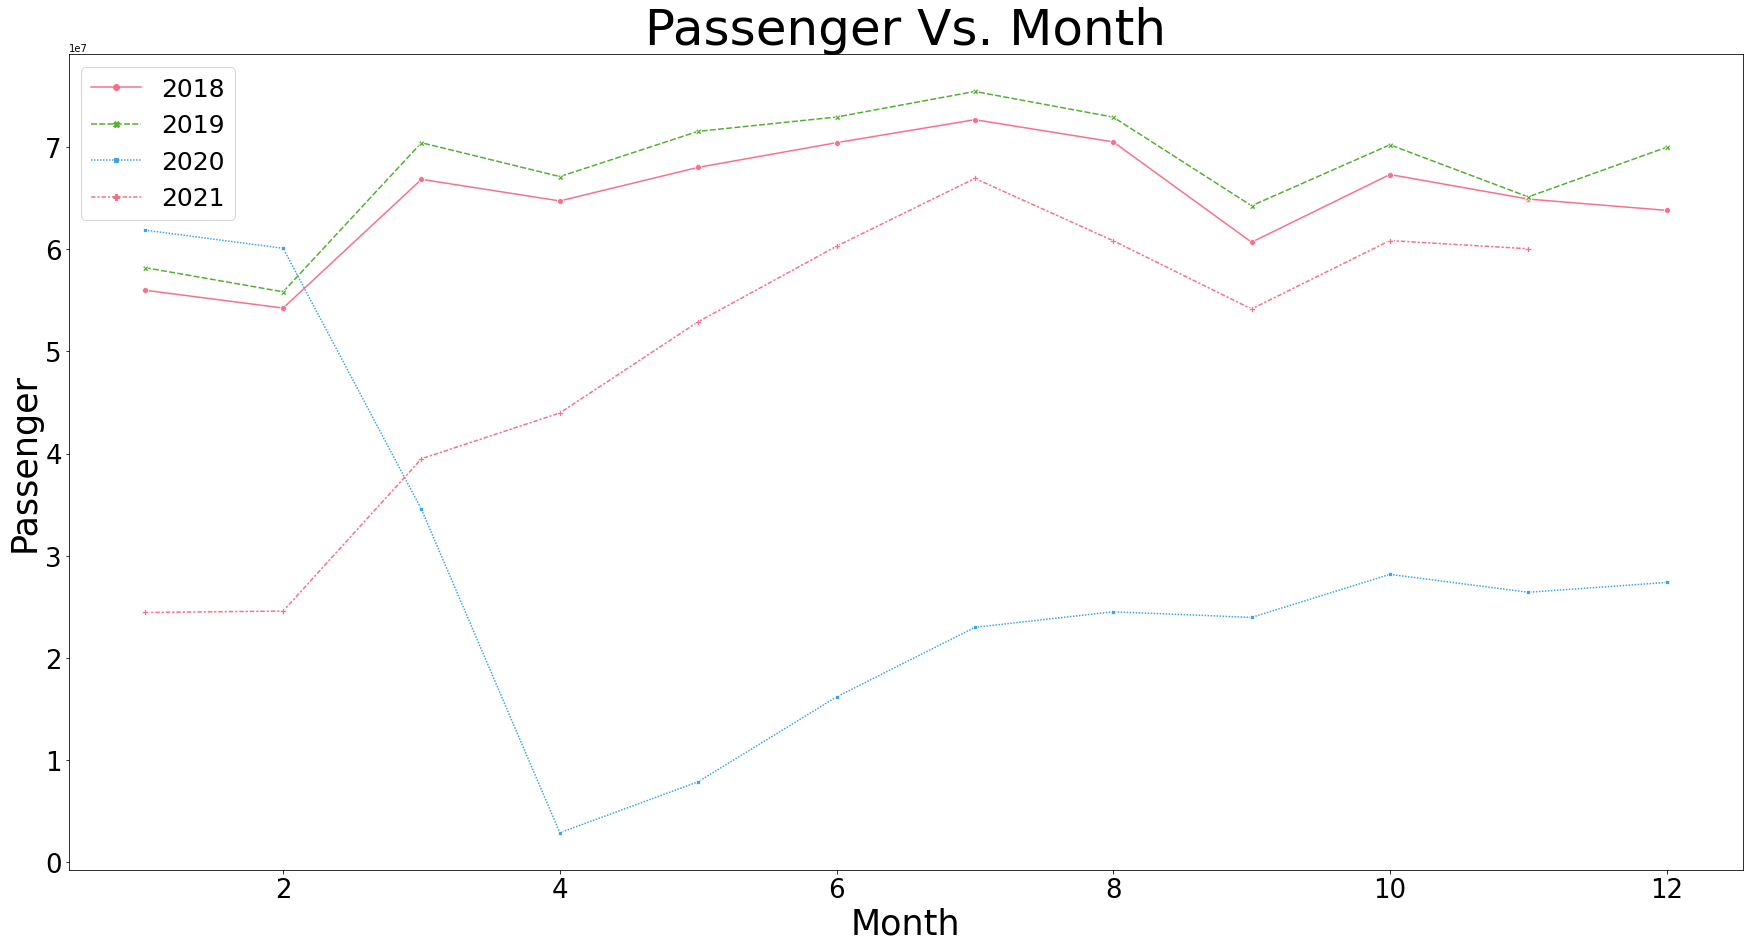

In [77]:
# proceess data for month plot. Group data on month and count passenger for each month.
month_2018 = civil_2018.groupby("MONTH", as_index = False)["PASSENGERS"].sum()
month_2019 = civil_2019.groupby("MONTH", as_index = False)["PASSENGERS"].sum()
month_2020 = civil_2020.groupby("MONTH", as_index = False)["PASSENGERS"].sum()
month_2021 = civil_2021.groupby("MONTH", as_index = False)["PASSENGERS"].sum()

# Add a column indicate the year
month_2018["year"] = 2018
month_2019["year"] = 2019
month_2020["year"] = 2020
month_2021["year"] = 2021

# combine 4 dataset for graph
plot_data = month_2018.append(month_2019, ignore_index=True)
plot_data = plot_data.append(month_2020, ignore_index=True)
plot_data = plot_data.append(month_2021, ignore_index=True)

# make plot
fig, ax = plt.subplots(1, figsize=(30, 15))
ax.set_title("Passenger Vs. Month", fontsize = 50)
sns.set_palette(["red", "green", "orange", "blue"])
graph = sns.lineplot(data=plot_data, x="MONTH", y="PASSENGERS", style="year", hue="year", markers=True, palette="husl")
graph.legend(fontsize=25)
graph.tick_params(labelsize=26)
graph.set_xlabel("Month", fontsize=35)
graph.set_ylabel("Passenger", fontsize=35)
fig.savefig("./result_graph/passenger.png")


The graph shows how passengers change over month. It really make sense that during March and April of 2020, there are a huge drop and that is the time when COVID took place.

In [33]:
df = gpd.read_file(us_map)

<AxesSubplot:>

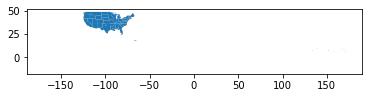

In [34]:
df = df[(df['NAME'] != 'Alaska') & (df['NAME'] != 'Hawaii')]
df.plot()
